In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

reg = LinearRegression()
data = pd.read_csv('card.csv')
clean = data.dropna()

#### Part A

Text(0.5, 1.0, 'Histogram of Wage')

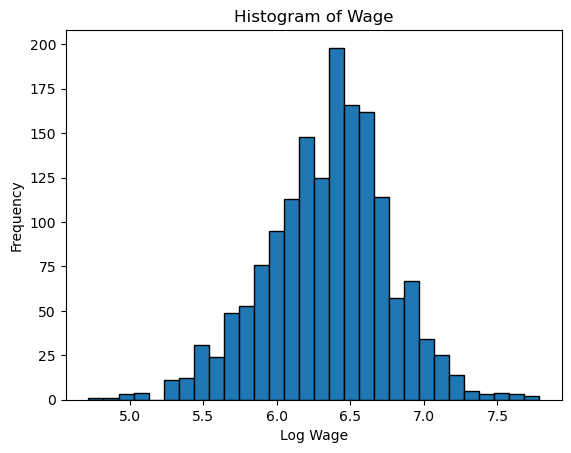

In [159]:
ln_wage = np.log(clean['wage'])

plt.hist(ln_wage, bins=30, edgecolor='black')
plt.xlabel('Log Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Wage')

#### Part B

In [135]:
data['exper^2'] = data['exper'] ** 2
controls = data[['exper', 'exper^2', 'black', 'smsa', 'south', 'smsa66', 'reg662', 'reg663', 'reg664', 'reg665', 'reg666', 'reg667', 'reg668', 'reg669']]

educ = clean['educ']
X_a = educ.to_frame(name='educ').join(controls)
X_a = sm.add_constant(X_a)
model = sm.OLS(ln_wage, X_a).fit()

print(f"The coefficient for β1 (educ) is: {model.params['educ']:.4f}")
print(f"The standard error for β1 (educ) is: {model.bse['educ']:.4f}")

The coefficient for β1 (educ) is: 0.0774
The standard error for β1 (educ) is: 0.0051


#### Part C

In [136]:
nearc4 = clean[['nearc4']]
educ = clean['educ']
reg.fit(nearc4, educ)

print(f"First stage coefficient for γ1 (nearc4) on educ is: {reg.coef_[0]:.4f}")

controls_c = clean[['nearc4']].join(controls)
reg.fit(controls_c, educ)

print(f"Full model coefficient for γ1 (nearc4) on educ is: {reg.coef_[0]:.4f}")


First stage coefficient for γ1 (nearc4) on educ is: 0.5018
Full model coefficient for γ1 (nearc4) on educ is: 0.3197


The Instrument Relevance condition indicates that the chosen IV (nearc4) must be correlated with the explanatory variable (educ) but not correlated with the omitted variables (rest of the controls).
Given the results of the analysis where the estimate of the IV is very different between the First Stage Regression and the Full Model, this indicates that the IV is correlated with the omitted variables and is thus a poor IV.

#### Part D

In [137]:
nearc4 = clean[['nearc4']]
educ = clean['educ']

X_first_D = nearc4.join(controls)

# First stage regression using statsmodels to get fitted values
X_first_constant_D = sm.add_constant(X_first_D)
model_first_D = sm.OLS(educ, X_first_constant_D).fit()

# Fitted values from the first stage regression
educ_hat = model_first_D.fittedvalues

# Second stage regression
X_second_D = educ_hat.to_frame(name='educ_hat').join(controls)
X_second_constant_D = sm.add_constant(X_second_D)  
model_second_D = sm.OLS(ln_wage, X_second_constant_D).fit()

beta_1 = model_second_D.params['educ_hat']
beta_1_se = model_second_D.bse['educ_hat']

print(f"IV estimate for β1 (educ) with nearc4 as the IV is: {beta_1:.4f}")
print(f"Standard error for β1 (educ) with nearc4 as the IV is: {beta_1_se:.4f}")

IV estimate for β1 (educ) with nearc4 as the IV is: 0.0331
Standard error for β1 (educ) with nearc4 as the IV is: 0.0768


#### Part E

In [138]:
nearc4 = clean[['nearc4']]
IQ = clean['IQ']

reg.fit(nearc4, IQ)
print(f"The coefficient for π1 (nearc4) on IQ is: {reg.coef_[0]:.4f}")

controls_e = nearc4.join(controls)
reg.fit(controls_e, IQ)
print(f"The coefficient for π1 (nearc4) on IQ with controls is: {reg.coef_[0]:.4f}")

The coefficient for π1 (nearc4) on IQ is: 2.3639
The coefficient for π1 (nearc4) on IQ with controls is: 0.2209


Similar to the previous IV analysis in part C, this IV (nearc4) on IQ appears to fail relevance condition considering that its estimation is not independent from the error term (controls). This indicates that there is an omitted variable bias problem on the first stage regression, thus indicating that the exogeneity assumption does not hold.

#### Part F

In [143]:
X_first_F = nearc4.join(controls)

# First stage regression using statsmodels to get fitted values
X_first_constant_F = sm.add_constant(X_first_F)
model_first_F = sm.OLS(IQ, X_first_constant_F).fit()

# Fitted values from the first stage regression
IQ_hat = model_first_F.fittedvalues

# Second stage regression
X_second_F = IQ_hat.to_frame(name='IQ_hat').join(controls)
X_second_constant_F = sm.add_constant(X_second_F)  
model_second_D = sm.OLS(ln_wage, X_second_constant_F).fit()

beta_1 = model_second_D.params['IQ_hat']
beta_1_se = model_second_D.bse['IQ_hat']

print(f"IV estimate for β1 (IQ) with nearc4 as the IV is: {beta_1:.4f}")
print(f"Standard error for β1 (IQ) with nearc4 as the IV is: {beta_1_se:.4f}")

IV estimate for β1 (IQ) with nearc4 as the IV is: 0.0479
Standard error for β1 (IQ) with nearc4 as the IV is: 0.1111


β1 for (f) is smaller than that for (b) but larger than that for (d).
The standard error for (f) is larger than that for both (b) and (d).

#### Part G

The model presented in (f) is Jusst-Identified because the number of IVs (nearc4) matches the number of endogenous variables (IQ).
An additional IV could include "proximity to a library." This IV matches the relevancy condition as it is variable that can be correlated to directly effect IQ developement while being exogenous to the error terms for wages.

#### Part H

In [187]:
# Get IQ and ln_wage from clean data
IQ = clean['IQ']
ln_wage = np.log(clean['wage'])

# Step 1: First Stage Regression
# IQ = f(nearc4, controls)
X_first = nearc4.join(controls)

# Ensure all data shares the same index as clean
X_first = X_first.reindex(clean.index)
IQ = IQ.reindex(clean.index)
ln_wage = ln_wage.reindex(clean.index)
controls = controls.reindex(clean.index)

# Remove any rows with missing values
valid_rows = ~(X_first.isna().any(axis=1) | IQ.isna() | ln_wage.isna())
X_first_clean = X_first[valid_rows]
IQ_clean = IQ[valid_rows]
ln_wage_clean = ln_wage[valid_rows]
controls_clean = controls[valid_rows]

print(f"Using {valid_rows.sum()} complete observations out of {len(valid_rows)}")

# Run first stage
X_first_constant = sm.add_constant(X_first_clean)
first_stage = sm.OLS(IQ_clean, X_first_constant).fit()

# Get fitted values and residuals
IQ_hat = first_stage.fittedvalues
v_hat = IQ_clean - IQ_hat  # First-stage residuals

# Step 2: Augmented Regression  
# Create augmented X matrix
augmented_X = pd.DataFrame({
    'IQ': IQ_clean.values,  # Use .values to avoid index issues
    **{col: controls_clean[col].values for col in controls_clean.columns},
    'first_stage_resid': v_hat.values
}, index=IQ_clean.index)

# Run augmented regression
augmented_model = sm.OLS(ln_wage_clean, sm.add_constant(augmented_X)).fit()

# Step 3: Test Results
delta = augmented_model.params['first_stage_resid']
p_value = augmented_model.pvalues['first_stage_resid']
t_stat = augmented_model.tvalues['first_stage_resid']

print(f"\nWu-Hausman Test Results:")
print(f"Coefficient on residuals: {delta:.6f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\nConclusion: Reject H₀ at 5% level - IQ is endogenous, use IV")
else:
    print("\nConclusion: Fail to reject H₀ - No strong evidence of endogeneity")

Using 1600 complete observations out of 1600

Wu-Hausman Test Results:
Coefficient on residuals: -0.041882
t-statistic: -0.3841
p-value: 0.700972

Conclusion: Fail to reject H₀ - No strong evidence of endogeneity


#### Part I

In [148]:
nearc4 = clean[['nearc4']]
nearc2 = clean[['nearc2']]
educ = clean['educ']

X_first_f = nearc4.join(nearc2).join(controls)
X_first_constant_f = sm.add_constant(X_first_f)
model_first_f = sm.OLS(educ, X_first_constant_f).fit()

educ_hat_f = model_first_f.fittedvalues

X_second_f = educ_hat_f.to_frame(name='educ_hat').join(controls)
X_second_constant_f = sm.add_constant(X_second_f)
model_second_f = sm.OLS(ln_wage, X_second_constant_f).fit()

beta_1_f = model_second_f.params['educ_hat']
beta_1_se_f = model_second_f.bse['educ_hat']

print(f"IV estimate for β1 (educ) with nearc4 and nearc2 as the IVs is: {beta_1_f:.4f}")
print(f"Standard error for β1 (educ) with nearc4 and nearc2 as the IVs is: {beta_1_se_f:.4f}")

IV estimate for β1 (educ) with nearc4 and nearc2 as the IVs is: 0.0773
Standard error for β1 (educ) with nearc4 and nearc2 as the IVs is: 0.0731


#### Part J

In [150]:
from scipy import stats

# Get second stage residuals from your model
second_stage_residuals = ln_wage - model_second_f.fittedvalues

# Regress residuals on all instruments and controls (using your structure)
X_sargan = nearc4.join(nearc2).join(controls)
X_sargan_constant = sm.add_constant(X_sargan)
sargan_model = sm.OLS(second_stage_residuals, X_sargan_constant).fit()

# Calculate J-statistic
n = len(clean)
sargan_r_squared = sargan_model.rsquared
j_statistic = n * sargan_r_squared

# Degrees of freedom = instruments - endogenous variables = 2 - 1 = 1
df_sargan = 1
sargan_p_value = 1 - stats.chi2.cdf(j_statistic, df_sargan)

print(f"Sargan J-statistic: {j_statistic:.4f}")
print(f"p-value: {sargan_p_value:.6f}")

if sargan_p_value < 0.05:
    print("✗ REJECT instrument validity (p < 0.05)")
    print("  At least one instrument appears invalid")
elif sargan_p_value < 0.10:
    print("⚠ Weak evidence against instruments (0.05 ≤ p < 0.10)")
    print("  Some concern about instrument validity")
else:
    print("✓ ACCEPT instrument validity (p ≥ 0.10)")
    print("  No evidence against instruments")

Sargan J-statistic: 3.6410
p-value: 0.056373
⚠ Weak evidence against instruments (0.05 ≤ p < 0.10)
  Some concern about instrument validity


#### Part K

In [151]:
# Using your first stage model (model_first_f)
r_squared = model_first_f.rsquared
f_statistic_overall = model_first_f.fvalue
f_p_value_overall = model_first_f.f_pvalue

print(f"R-squared: {r_squared:.6f}")
print(f"Overall F-statistic: {f_statistic_overall:.4f}")
print(f"Overall F-test p-value: {f_p_value_overall:.6f}")

# Joint test for instruments significance: H₀: nearc4 = nearc2 = 0
try:
    # Wald test for joint significance of instruments
    restrictions = ['nearc4 = 0', 'nearc2 = 0'] 
    wald_test = model_first_f.wald_test(restrictions)
    wald_f_stat = wald_test.statistic
    wald_p_value = wald_test.pvalue
    
    print(f"\nJoint significance test (Wald/F-test):")
    print(f"F-statistic for instruments: {wald_f_stat:.4f}")
    print(f"p-value: {wald_p_value:.6f}")
    
    if wald_p_value < 0.05:
        print("✓ Instruments are jointly significant (p < 0.05)")
    else:
        print("✗ Instruments are NOT jointly significant (p ≥ 0.05)")
        
    # Weak instruments assessment
    if wald_f_stat > 10:
        print(f"✓ Strong instruments (F = {wald_f_stat:.4f} > 10)")
    elif wald_f_stat > 5:
        print(f"⚠ Moderately weak instruments (F = {wald_f_stat:.4f})")
    else:
        print(f"✗ Weak instruments (F = {wald_f_stat:.4f} < 5)")
        
except:
    # Alternative method if wald_test fails
    print(f"\nAlternative assessment:")
    print(f"Individual t-statistics:")
    print(f"nearc4 t-stat: {model_first_f.tvalues['nearc4']:.4f}")
    print(f"nearc2 t-stat: {model_first_f.tvalues['nearc2']:.4f}")
    
    # Rule of thumb: if both |t| > 2, instruments are individually significant
    t_nearc4 = abs(model_first_f.tvalues['nearc4'])
    t_nearc2 = abs(model_first_f.tvalues['nearc2'])
    
    if t_nearc4 > 2 and t_nearc2 > 2:
        print("✓ Both instruments individually significant (|t| > 2)")
    elif t_nearc4 > 2 or t_nearc2 > 2:
        print("⚠ Only one instrument individually significant")
    else:
        print("✗ Neither instrument individually significant")

R-squared: 0.365510
Overall F-statistic: 56.9948
Overall F-test p-value: 0.000000

Joint significance test (Wald/F-test):

Alternative assessment:
Individual t-statistics:
nearc4 t-stat: 2.7722
nearc2 t-stat: 0.9121
⚠ Only one instrument individually significant


c:\Users\evanm\anaconda3\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
